In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import warnings
import numpy
import re
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
nlp = spacy.load('en_core_web_sm')

In [5]:
pd.set_option('display.max_columns', None)

***every thing about cleaning dataset i do not need it any more beacause i saved the preprocessed data so i comment it***

In [20]:
# df1 = pd.read_csv('/content/drive/MyDrive/drug review/drugsComTest_raw.tsv', sep='\t')
# df2 = pd.read_csv('/content/drive/MyDrive/drug review/drugsComTrain_raw.tsv', sep='\t')
# df = pd.concat([df1, df2])
# df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
# df.shape

(215063, 7)

In [ ]:
# df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [21]:
# df.condition.value_counts().sort_values(ascending=False)

,count
condition,
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435
...,...
121</span> users found this comment helpful.,1
ungal Infection Prophylaxis,1
Short Stature,1


In [ ]:
# df = df[(df['condition'] == "Birth Control") | (df['condition'] == "Depression") | (df['condition'] == "Pain") | (df['condition'] == "Acne") | (df['condition'] == "Anxiety")]

In [ ]:
# df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6.0,"June 6, 2016",1
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,"April 16, 2011",3
17,33173,Microgestin Fe 1 / 20,Acne,"""So I was on Ginanvi for about 3 months before...",3.0,"June 22, 2017",1


In [ ]:
# df.condition.value_counts()

,count
condition,
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435


In [ ]:
# df.drop(['Unnamed: 0', 'drugName', 'date', 'usefulCount','rating'], axis=1, inplace=True)

In [ ]:
# df.head(),df.shape

(        condition                                             review
 0      Depression  "I&#039;ve tried a few antidepressants over th...
 4   Birth Control  "I have been on this birth control for one cyc...
 6   Birth Control  "I&#039;ve had the copper coil for about 3 mon...
 9   Birth Control  "I was on this pill for almost two years. It d...
 17           Acne  "So I was on Ginanvi for about 3 months before...,
 (74092, 2))

In [ ]:
# df['review'].iloc[7000]

'"I love my Nexplanon implant. It&#039;s so easy to have it implanted then that&#039;s it. Forget about it. So easy. The first 3 days the spot where it was implanted it stung a little. It&#039;s cleared up my face. No weight gain. I love it. Highly recommend it."'

In [ ]:
# def preprocess(text):
#   if text[0] == '"':
#     text = text[1:-1]

#   text = re.sub('[^a-zA-Z]', ' ', text)
#   text = text.lower()

#   doc = nlp(text)
#   tokens = [token.lemma_ for token in doc if not token.is_stop]
#   return text

In [ ]:
# df['preprocessed_review'] = df['review'].apply(preprocess)
# df.head()

,condition,review,preprocessed_review
0,Depression,"""I&#039;ve tried a few antidepressants over th...",i ve tried a few antidepressants over the...
4,Birth Control,"""I have been on this birth control for one cyc...",i have been on this birth control for one cycl...
6,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",i ve had the copper coil for about mont...
9,Birth Control,"""I was on this pill for almost two years. It d...",i was on this pill for almost two years it do...
17,Acne,"""So I was on Ginanvi for about 3 months before...",so i was on ginanvi for about months before ...


In [ ]:
# # break point save the dataset in my dirve
# df.to_csv('/content/drive/MyDrive/drug review/preprocessed_data.csv', index=False)

In [112]:
df = pd.read_csv('/content/drive/MyDrive/drug review/preprocessed_data.csv')
df.head()

,condition,review,preprocessed_review
0,Depression,"""I&#039;ve tried a few antidepressants over th...",i ve tried a few antidepressants over the...
1,Birth Control,"""I have been on this birth control for one cyc...",i have been on this birth control for one cycl...
2,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",i ve had the copper coil for about mont...
3,Birth Control,"""I was on this pill for almost two years. It d...",i was on this pill for almost two years it do...
4,Acne,"""So I was on Ginanvi for about 3 months before...",so i was on ginanvi for about months before ...


In [113]:
df.condition.value_counts().sort_values(ascending=False)

,count
condition,
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435


In [114]:
df = df[(df['condition'] == "Birth Control") | (df['condition'] == "Depression") | (df['condition'] == "Pain") | (df['condition'] == "Acne")]

In [115]:
df.condition.value_counts().sort_values(ascending=False)

,count
condition,
Birth Control,38436
Depression,12164
Pain,8245
Acne,7435


In [65]:
# max_count = 10000

# df = df.groupby('condition', group_keys=False).apply(lambda x: x.sample(min(len(x), max_count)))

# print(df['condition'].value_counts())

condition
Birth Control    10000
Depression       10000
Pain              8245
Anxiety           7812
Acne              7435
Name: count, dtype: int64


#Bag Of Words

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_vector = cv.fit_transform(df['preprocessed_review'])

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['condition'])

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(count_vector, y,stratify=y ,test_size=0.2,random_state=47)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1487
           1       0.97      0.98      0.97      7687
           2       0.94      0.96      0.95      2433
           3       0.96      0.92      0.94      1649

    accuracy                           0.96     13256
   macro avg       0.95      0.93      0.94     13256
weighted avg       0.96      0.96      0.96     13256



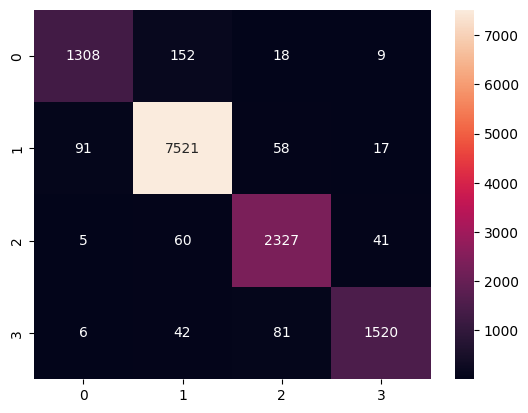

In [119]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1487
           1       0.98      0.99      0.98      7687
           2       0.95      0.98      0.96      2433
           3       0.97      0.94      0.96      1649

    accuracy                           0.97     13256
   macro avg       0.97      0.95      0.96     13256
weighted avg       0.97      0.97      0.97     13256



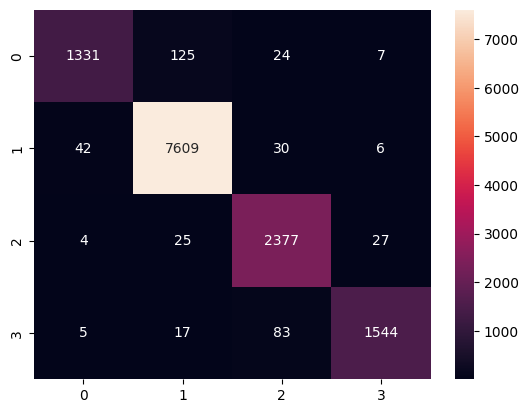

In [120]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

#TF-IDF

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_vector = tfidf.fit_transform(df['preprocessed_review'])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, y,stratify=y ,test_size=0.2,random_state=47)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80      1487
           1       0.88      1.00      0.93      7687
           2       0.94      0.86      0.90      2433
           3       0.99      0.77      0.87      1649

    accuracy                           0.91     13256
   macro avg       0.95      0.83      0.88     13256
weighted avg       0.92      0.91      0.90     13256



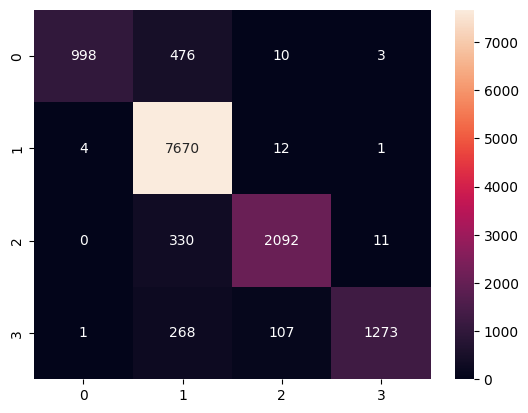

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1487
           1       0.99      0.99      0.99      7687
           2       0.97      0.98      0.97      2433
           3       0.96      0.97      0.96      1649

    accuracy                           0.98     13256
   macro avg       0.97      0.97      0.97     13256
weighted avg       0.98      0.98      0.98     13256



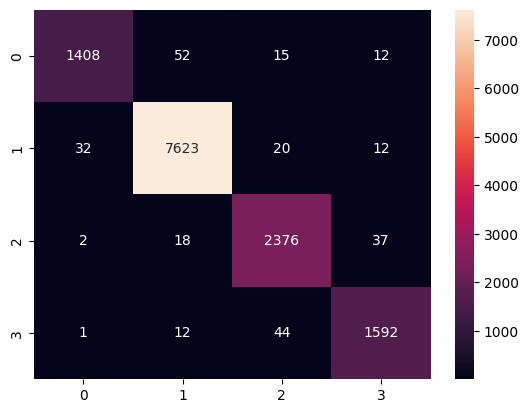

In [124]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

#Bi-grame

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf_vector = tfidf.fit_transform(df['preprocessed_review'])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, y,stratify=y ,test_size=0.2,random_state=47)

              precision    recall  f1-score   support

           0       1.00      0.09      0.16      1487
           1       0.64      1.00      0.78      7687
           2       0.97      0.30      0.46      2433
           3       1.00      0.26      0.41      1649

    accuracy                           0.68     13256
   macro avg       0.90      0.41      0.45     13256
weighted avg       0.79      0.68      0.61     13256



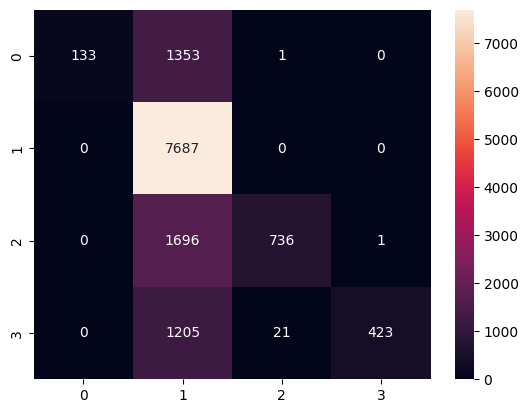

In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1487
           1       0.99      1.00      0.99      7687
           2       0.97      0.98      0.98      2433
           3       0.98      0.97      0.97      1649

    accuracy                           0.99     13256
   macro avg       0.98      0.98      0.98     13256
weighted avg       0.99      0.99      0.99     13256



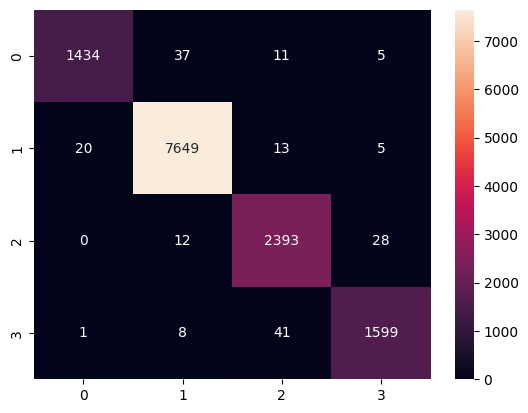

In [128]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

#Tri-grame

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,3))
tfidf_vector = tfidf.fit_transform(df['preprocessed_review'])

In [130]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, y,stratify=y ,test_size=0.2,random_state=47)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      1487
           1       0.61      1.00      0.76      7687
           2       0.98      0.14      0.24      2433
           3       1.00      0.13      0.22      1649

    accuracy                           0.62     13256
   macro avg       0.90      0.32      0.32     13256
weighted avg       0.77      0.62      0.51     13256



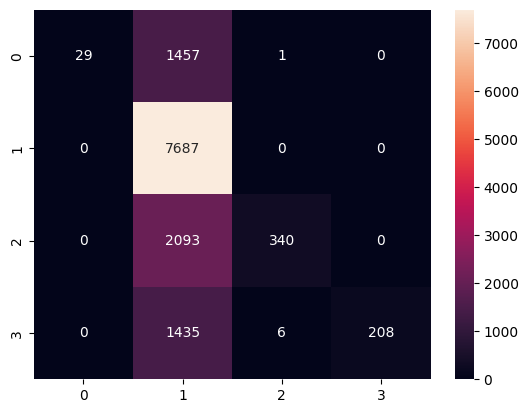

In [131]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1487
           1       0.99      1.00      0.99      7687
           2       0.98      0.99      0.98      2433
           3       0.98      0.97      0.97      1649

    accuracy                           0.99     13256
   macro avg       0.98      0.98      0.98     13256
weighted avg       0.99      0.99      0.99     13256



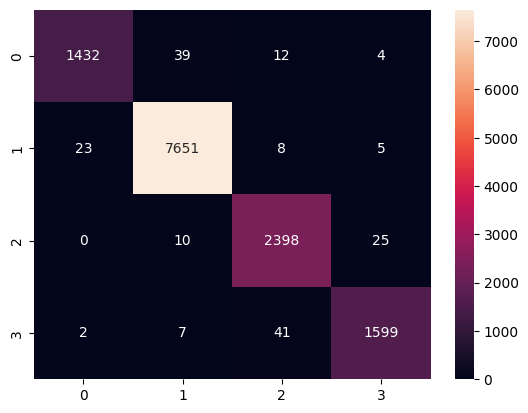

In [132]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [133]:
import joblib
joblib.dump(tfidf_vector, '/content/drive/MyDrive/tri_tfidf_vector.pkl')
joblib.dump(pac, '/content/drive/MyDrive/pac.pkl')

['/content/drive/MyDrive/pac.pkl']

In [ ]:
# for load the models
vectorizer = joblib.load('/content/drive/MyDrive/drug review/tri_tfidf_vector.pkl')
pac = joblib.load('/content/drive/MyDrive/drug review/pac.pkl')